<p align="center">
Universidade Federal de Alagoas</br>

Instituto de Computação</br>

</p>

# Trabalho Prático AB2

Disciplina: Sistemas Distribuídos

Semestre letivo: 2017.1

Professor: André Lage Freitas

## Atividades extras realizadas

- Comentários em inglês, explicando o funcionamento do código em geral.
- Documentação em inglês nas funções de plot.

## Especificação

**Importante**. Leia atentamente essa seção pois só serão aceitos trabalhos que obedecerem as a especificações a seguir. 

Baseado(a) no exemplo a seguir de implementação do B-multicast em Julia, façam os exercícios descritos nesse documento.

In [1]:
# Importing the Distributed package, which provides the functionality we'll need for this exercise
using Distributed

In [2]:
# defining the function for B-multicast
function B_multicast(g,m,B_deliver)
    for p in g
        remotecall(B_deliver, p, m)
    end
end

# Adding 3 processes (workers)
#addprocs(3)

# My group is composed by all workers
g = workers()

# Multicasting "oi!" message to group `g` by assuming `println` as B_deliver function.
B_multicast(g,"oi!",println)

oi!


### Exercício 1: Sincronismo (2,0 pontos)

Adicione 10 processos com o comando `addprocs` abaixo. 

_Atenção_: sua instalação local de Julia pode não conseguir adicionar 10 processos, use a [JuliaBox](https://juliabox.com).

In [3]:
# adding workers for the exercise. We are calling rmprocs() in case the cell is rerun, so we'll have a maximum of 10 workers
rmprocs(workers())
addprocs(10)
g = workers()

┌ Warning: rmprocs: process 1 not removed
└ @ Distributed /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Distributed/src/cluster.jl:932


10-element Array{Int64,1}:
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

Modifique a implementação do B-multicast para utilizar communicação síncrona.

In [4]:
# Sync B-multicast implementation
function B_multicast_sync(g,m,B_deliver)
    for p in g
        # using remotecall_wait turns this remote call into a blocking one 
        remotecall_wait(B_deliver, p, m)
    end
end

B_multicast_sync (generic function with 1 method)

Execute as duas versões do B-multicast (síncrona e assíncrona) e compare as saídas.



In [5]:
# Multicasting a message to all of our 10 workers, using a sync B-multicast implementation and `println` as the B-deliver function 
B_multicast_sync(g,"oi sync!",println)

      From worker 2:	oi sync!
      From worker 3:	oi sync!
      From worker 4:	oi sync!
      From worker 5:	oi sync!
      From worker 6:	oi sync!
      From worker 7:	oi sync!
      From worker 8:	oi sync!
      From worker 9:	oi sync!
      From worker 10:	oi sync!
      From worker 11:	oi sync!


In [6]:
# Multicasting a message to all of our 10 workers, using an async B-multicast implementation and `println` as the B-deliver function 
B_multicast(g,"oi async!",println)

      From worker 4:	oi async!
      From worker 3:	oi async!
      From worker 8:	oi async!
      From worker 2:	oi async!
      From worker 5:	oi async!
      From worker 7:	oi async!
      From worker 9:	oi async!
      From worker 11:	oi async!
      From worker 6:	oi async!
      From worker 10:	oi async!


A ordem das mensagens das saídas foram as mesmas para ambas versões do B-multicast? Por quê?

**Resposta**: _Não, ao utilizar o B-multicast síncrono, o laço que lança as chamadas remotas espera cada uma delas completar, o que faz com que as saídas sigam a ordem dos processos no grupo g. Já na versão assíncrona essa espera não existe, ou seja, a ordem de saída não será conhecida, dependendo de fatores do sistema. Se o core de determinado worker estiver mais carregado do que outro, a chance do segundo imprimir primeiro é maior._

### Exercício 2: Análise de desempenho do B-multicast (2,0 pontos)

Meça o tempo de execução duas versões do B-multicast (síncrona e assíncrona). Dica: utilize a macro `@time`.

* Execute 50 vezes essa medição e construa um gráfico em forma de barras:
	* cada barra representando cada versão do B-multicast;
	* calcule e coloque no gráfico o [intervalo de confiança](https://en.wikipedia.org/wiki/Confidence_interval) com nível de 95%.

In [13]:
# Variables used to store all running times and mean values for both async and sync implementations.
asyncElapsedTime = []
syncElapsedTime = []
syncAverageTime = 0
asyncAverageTime = 0
# Running sync B-multicast 50 times and storing values.
for i in 1:50 
    time = @elapsed begin
        B_multicast_sync(g,"oi sync!",println)
    end
    syncAverageTime += time/50
    push!(syncElapsedTime, time)
end
# Running async B-multicast 50 times and storing values.
for i in 1:50 
    time = @elapsed begin
        B_multicast(g,"oi async!",println)
    end
    asyncAverageTime += time/50
    push!(asyncElapsedTime, time)
end
syncSum = 0
asyncSum = 0
# Calculating the standard deviation for both implementations, using previously obtained samples.
for i in 1:50
    syncSum += (syncElapsedTime[i] - syncAverageTime) ^ 2
    asyncSum += (asyncElapsedTime[i] - asyncAverageTime) ^ 2
end
syncSigma = sqrt(syncSum/49)
asyncSigma = sqrt(asyncSum/49)
# Calculating the confidence interval. Since it's symmetric, we can leave the displacement in the y-direction to the plot lib.
# We are using formulas from the Wikipedia article the teacher provided.
syncIntervalAbs = 1.96 * (syncSigma/sqrt(50))
asyncIntervalAbs = 1.96 * (asyncSigma/sqrt(50))


      From worker 2:	oi sync!
      From worker 3:	oi sync!
      From worker 4:	oi sync!
      From worker 5:	oi sync!
      From worker 6:	oi sync!
      From worker 7:	oi sync!
      From worker 8:	oi sync!
      From worker 9:	oi sync!
      From worker 10:	oi sync!
      From worker 11:	oi sync!
      From worker 2:	oi sync!
      From worker 3:	oi sync!
      From worker 4:	oi sync!
      From worker 5:	oi sync!
      From worker 6:	oi sync!
      From worker 7:	oi sync!
      From worker 8:	oi sync!
      From worker 9:	oi sync!
      From worker 10:	oi sync!
      From worker 11:	oi sync!
      From worker 2:	oi sync!
      From worker 3:	oi sync!
      From worker 4:	oi sync!
      From worker 5:	oi sync!
      From worker 6:	oi sync!
      From worker 7:	oi sync!
      From worker 8:	oi sync!
      From worker 9:	oi sync!
      From worker 10:	oi sync!
      From worker 11:	oi sync!
      From worker 2:	oi sync!
      From worker 3:	oi sync!
      From worker 4:	oi sync!
    

      From worker 5:	oi sync!
      From worker 6:	oi sync!
      From worker 7:	oi sync!
      From worker 8:	oi sync!
      From worker 9:	oi sync!
      From worker 10:	oi sync!
      From worker 11:	oi sync!
      From worker 2:	oi sync!
      From worker 3:	oi sync!
      From worker 4:	oi sync!
      From worker 5:	oi sync!
      From worker 6:	oi sync!
      From worker 7:	oi sync!
      From worker 8:	oi sync!
      From worker 9:	oi sync!
      From worker 10:	oi sync!
      From worker 11:	oi sync!
      From worker 2:	oi sync!
      From worker 3:	oi sync!
      From worker 4:	oi sync!
      From worker 5:	oi sync!
      From worker 6:	oi sync!
      From worker 7:	oi sync!
      From worker 8:	oi sync!
      From worker 9:	oi sync!
      From worker 10:	oi sync!
      From worker 11:	oi sync!
      From worker 2:	oi sync!
      From worker 3:	oi sync!
      From worker 4:	oi sync!
      From worker 5:	oi sync!
      From worker 6:	oi sync!
      From worker 7:	oi sync!
    

2.7802257535808897e-5

      From worker 5:	oi async!
      From worker 5:	oi async!
      From worker 5:	oi async!
      From worker 5:	oi async!
      From worker 5:	oi async!
      From worker 5:	oi async!
      From worker 5:	oi async!
      From worker 5:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 9:	oi async!
      From worker 7:	oi async!
      From worker 7:	oi async!
      From worker 7:	oi async!
      From worker 7:	oi async!
      From worker 7:	oi async!
      From worker 7:	oi async!
      From worker 7:	oi async!
      From worker 7:	oi async!
      From worker 7:	oi async!
      From worker 7:	oi async!
      Fr

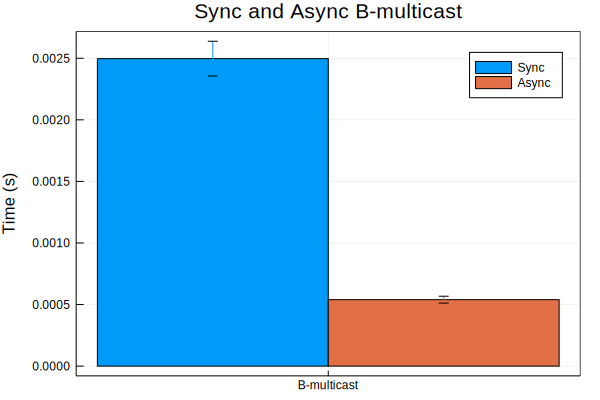

In [14]:
# Run the next line if Julia can't find the `StatsPlots` package.
#import Pkg; Pkg.add("StatsPlots")
# Importing the `StatsPlots` package, which will help us plotting the results found in the previous section.
using StatsPlots

# The first argument is an array containing group names. Since we have only one group of 2 bars, we provide just one name.
# The second argument is an array containing the bar values themselves.
# The third argument is the confidence interval. When passing an array with scalars, the `groupedbar` function will treat each value as a symmetric interval, which is exactly what we want.
# The last argument tells the `groupedbar` function we want the chart to have borders.
# The rest of the arguments are self-explanatory.
groupedbar(["B-multicast"], [syncAverageTime asyncAverageTime], yerr = [syncIntervalAbs asyncIntervalAbs], label = ["Sync", "Async"], ylabel = "Time (s)", title = "Sync and Async B-multicast", framestyle = :box)


 

* Qual das duas versões teve o menor tempo de execução? Por quê?

**Resposta**: _A versão assíncrona do B-multicast teve um menor tempo de execução. Isso se dá devido ao fato que o processo principal não aguarda cada mensagem ser transmitida e impressa, antes mesmo das mensagens serem impressas, o laço já terminou e, por consequência, o tempo parou de ser contado._



### Exercício 3: Análise de desempenho do R-multicast (3,0 pontos)

Implemente duas versões do algoritmo R-multicast: uma assíncrona e outra síncrona.



* R-multicast assíncrono

In [16]:
# We need to use the `@everywhere` macro in order to make the following variables available in all workers.
@everywhere workers() global received = []
@everywhere g = workers()

# The standard async B-multicast implementation. We are rewriting it here because we want to make it available to all workers.
@everywhere function B_multicast(g,m,B_deliver)
    for p in g
        remotecall(B_deliver, p, m)
    end
end

# Our B-deliver function is now different.
@everywhere function B_deliver(m)
    # First, we check if we didn't receive this message.
    if !(m in received)
        # If so, we push that message to our `received` array, multicast it to all workers and finally deliver the message.
        push!(received, m)
        B_multicast(g, m, B_deliver)
        R_deliver(m)
    end
end

@everywhere function R_deliver(m)
    println(m)
end

# Our R-multicast just calls the B-multicast implementation with a modified B-deliver function.
function R_multicast(g, m)
    B_multicast(g, m, B_deliver)
end

R_multicast (generic function with 1 method)

In [17]:
# Before each execution, we have to clear the `received` array in all workers.
@everywhere workers() global received = []
R_multicast(g, "oi reliable!")

      From worker 12:	oi reliable!
      From worker 21:	oi reliable!
      From worker 20:	oi reliable!
      From worker 19:	oi reliable!
      From worker 16:	oi reliable!
      From worker 17:	oi reliable!
      From worker 15:	oi reliable!
      From worker 14:	oi reliable!
      From worker 13:	oi reliable!
      From worker 18:	oi reliable!


* R-multicast síncrono

In [18]:
# The standard sync B-multicast implementation. We are rewriting it here because we want to make it available to all workers.
@everywhere function B_multicast_sync(g,m,B_deliver)
    for p in g
        remotecall_wait(B_deliver, p, m)
    end
end

# The sync B-deliver function is basically the same as the async one. 
# The difference is that we'll call the sync B-multicast implementation instead.
@everywhere function B_deliver_sync(m)
    if !(m in received)
        push!(received, m)
        B_multicast_sync(g, m, B_deliver_sync)
        R_deliver(m)
    end
end

# Our sync R-multicast just calls the sync B-multicast implementation with a modified B-deliver function.
function R_multicast_sync(g, m)
    B_multicast_sync(g, m, B_deliver_sync)
end

R_multicast_sync (generic function with 1 method)

In [19]:
# Before each execution, we have to clear the `received` array in all workers.
@everywhere workers() global received = []
R_multicast_sync(g, "oi reliable!")

      From worker 21:	oi reliable!
      From worker 20:	oi reliable!
      From worker 19:	oi reliable!
      From worker 18:	oi reliable!
      From worker 17:	oi reliable!
      From worker 16:	oi reliable!
      From worker 15:	oi reliable!
      From worker 14:	oi reliable!
      From worker 13:	oi reliable!
      From worker 12:	oi reliable!


Faça a mesma análise de desempenho para o R-multicast que você fez no Exercício 2.



In [21]:
# Variables used to store all running times and mean values for both async and sync implementations.
asyncElapsedTime = []
syncElapsedTime = []
syncAverageTime = 0
asyncAverageTime = 0
# Running sync R-multicast 50 times and storing values.
for i in 1:50 
    time = @elapsed begin
        @everywhere workers() global received = []
        R_multicast_sync(g,"oi reliable sync!")
    end
    syncAverageTime += time/50
    push!(syncElapsedTime, time)
end
# Running async R-multicast 50 times and storing values.
for i in 1:50 
    time = @elapsed begin
        @everywhere workers() global received = []
        R_multicast(g,"oi reliable async!")
    end
    asyncAverageTime += time/50
    push!(asyncElapsedTime, time)
end
# Calculating the standard deviation for both implementations, using previously obtained samples.
syncSum = 0
asyncSum = 0
for i in 1:50
    syncSum += (syncElapsedTime[i] - syncAverageTime) ^ 2
    asyncSum += (asyncElapsedTime[i] - asyncAverageTime) ^ 2
end
syncSigma = sqrt(syncSum/49)
asyncSigma = sqrt(asyncSum/49)
# Calculating the confidence interval. Since it's symmetric, we can leave the displacement in the y-direction to the plot lib.
# We are using formulas from the Wikipedia article the teacher provided.
syncIntervalAbs = 1.96 * (syncSigma/sqrt(50))
asyncIntervalAbs = 1.96 * (asyncSigma/sqrt(50))

      From worker 21:	oi reliable sync!
      From worker 20:	oi reliable sync!
      From worker 19:	oi reliable sync!
      From worker 18:	oi reliable sync!
      From worker 17:	oi reliable sync!
      From worker 16:	oi reliable sync!
      From worker 15:	oi reliable sync!
      From worker 14:	oi reliable sync!
      From worker 13:	oi reliable sync!
      From worker 12:	oi reliable sync!
      From worker 21:	oi reliable sync!
      From worker 20:	oi reliable sync!
      From worker 19:	oi reliable sync!
      From worker 18:	oi reliable sync!
      From worker 17:	oi reliable sync!
      From worker 16:	oi reliable sync!
      From worker 15:	oi reliable sync!
      From worker 14:	oi reliable sync!
      From worker 13:	oi reliable sync!
      From worker 12:	oi reliable sync!
      From worker 21:	oi reliable sync!
      From worker 20:	oi reliable sync!
      From worker 19:	oi reliable sync!
      From worker 18:	oi reliable sync!
      From worker 17:	oi reliable sync!


      From worker 19:	oi reliable sync!
      From worker 18:	oi reliable sync!
      From worker 17:	oi reliable sync!
      From worker 16:	oi reliable sync!
      From worker 15:	oi reliable sync!
      From worker 14:	oi reliable sync!
      From worker 13:	oi reliable sync!
      From worker 12:	oi reliable sync!
      From worker 21:	oi reliable sync!
      From worker 20:	oi reliable sync!
      From worker 19:	oi reliable sync!
      From worker 18:	oi reliable sync!
      From worker 17:	oi reliable sync!
      From worker 16:	oi reliable sync!
      From worker 15:	oi reliable sync!
      From worker 14:	oi reliable sync!
      From worker 13:	oi reliable sync!
      From worker 12:	oi reliable sync!
      From worker 21:	oi reliable sync!
      From worker 20:	oi reliable sync!
      From worker 19:	oi reliable sync!
      From worker 18:	oi reliable sync!
      From worker 17:	oi reliable sync!
      From worker 16:	oi reliable sync!
      From worker 15:	oi reliable sync!


      From worker 21:	oi reliable sync!
      From worker 20:	oi reliable sync!
      From worker 19:	oi reliable sync!
      From worker 18:	oi reliable sync!
      From worker 17:	oi reliable sync!
      From worker 16:	oi reliable sync!
      From worker 15:	oi reliable sync!
      From worker 14:	oi reliable sync!
      From worker 13:	oi reliable sync!
      From worker 12:	oi reliable sync!
      From worker 21:	oi reliable sync!
      From worker 20:	oi reliable sync!
      From worker 19:	oi reliable sync!
      From worker 18:	oi reliable sync!
      From worker 17:	oi reliable sync!
      From worker 16:	oi reliable sync!
      From worker 15:	oi reliable sync!
      From worker 14:	oi reliable sync!
      From worker 13:	oi reliable sync!
      From worker 12:	oi reliable sync!
      From worker 21:	oi reliable sync!
      From worker 20:	oi reliable sync!
      From worker 19:	oi reliable sync!
      From worker 18:	oi reliable sync!
      From worker 17:	oi reliable sync!


      From worker 21:	oi reliable async!
      From worker 16:	oi reliable async!
      From worker 15:	oi reliable async!
      From worker 14:	oi reliable async!
      From worker 19:	oi reliable async!
      From worker 20:	oi reliable async!
      From worker 18:	oi reliable async!
      From worker 17:	oi reliable async!
      From worker 17:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 14:	oi reliable async!
      From worker 19:	oi reliable async!
      From worker 18:	oi reliable async!
      From worker 17:	oi reliable async!
      From worker 21:	oi reliable async!
      From worker 20:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 15:	oi reliable async!
      From worker 16:	oi reliable async!
      From worker 15:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 14:	oi reliable async!
      From worker 17:	oi reliable async!
      From worke

      From worker 19:	oi reliable async!
      From worker 16:	oi reliable async!
      From worker 17:	oi reliable async!
      From worker 18:	oi reliable async!
      From worker 12:	oi reliable async!
      From worker 20:	oi reliable async!
      From worker 15:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 21:	oi reliable async!
      From worker 14:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 21:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 12:	oi reliable async!
      From worker 20:	oi reliable async!
      From worker 19:	oi reliable async!
      From worker 18:	oi reliable async!
      From worker 14:	oi reliable async!
      From worker 16:	oi reliable async!
      From worker 14:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 21:	oi reliable async!
      From worker 18:	oi reliable async!
      From worke

0.0042558131553859435

      From worker 16:	oi reliable async!
      From worker 13:	oi reliable async!
      From worker 17:	oi reliable async!
      From worker 18:	oi reliable async!
      From worker 19:	oi reliable async!
      From worker 14:	oi reliable async!


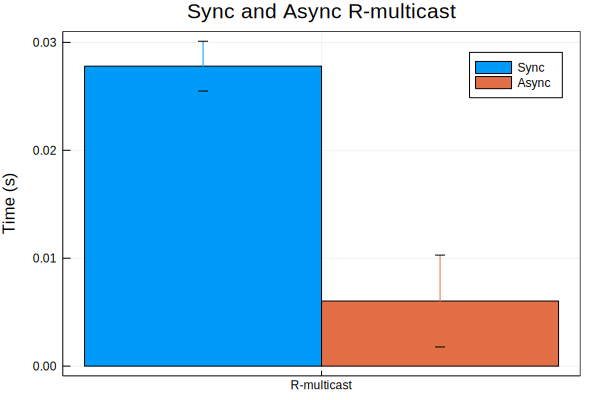

In [22]:
# The arguments are the same as before.
groupedbar(["R-multicast"], [syncAverageTime asyncAverageTime], yerr = [syncIntervalAbs asyncIntervalAbs], label = ["Sync", "Async"], ylabel = "Time (s)", title = "Sync and Async R-multicast", framestyle = :box)


    
    
* Qual das duas versões (R-multicast assíncrono e assíncrono) teve o menor tempo de execução? Por quê?

**Resposta**: _O R-multicast assíncrono teve um menor tempo de execução. Isso se dá, novamente, ao fato de que as chamadas remotas não são bloqueantes, o que faz o laço primário terminar rapidamente._





### Exercício 4: Análise de desempenho: B-multicast vs. R-multicast (3,0 pontos)

Para cada uma das comparações abaixo, qual dos algoritmos teve o menor tempo de execução? Por quê?

* B-multicast assíncrono vs. R-multicast assíncrono.
    

**Resposta**: _O B-multicast assíncrono teve menor tempo de execução quando comparado ao R-multicast assíncrono. Isso é esperado, dado que o R-multicast tem recursos de garantia de entrega, por isso é um protocolo confiável. Tais garantias aumentam sua complexidade, aumentando o tempo de execução._    
    
* B-multicast síncrono vs. R-multicast síncrono.


**Resposta**: _Novamente, a implementação B-multicast tem menor tempo de execução, pelo mesmo motivo explicado anteriormente. As garantias fornecidas pelo R-multicast acabam tornando-o mais lento para executar, devido a sua alta complexidade em relação a um B-multicast._

## Entrega

As respostas deverão ser entregues nos devidos campos desse arquivo, ou seja, em [Markdown](https://en.wikipedia.org/wiki/Markdown) e no formato [IJulia Notebook](https://github.com/JuliaLang/IJulia.jl).

O programa deve ser implementado na linguagem de programação **Julia**. Seu trabalho será testado na [JuliaBox](https://juliabox.com), portanto teste seu arquivo IJulia na JulizBox antes de enviá-lo.


### Forma 

O arquivo IJulia Notebook deverá ser entregue ao Professor **exclusivamente através do Google Classroom**.



A responsabilidade sobre a integridade do arquivo contendo trabalho é exclusivamente dos discentes. Serão ignorados os trabalhos cujos arquivos não conseguirem ser abertos pelo Professor.

### Prazos

O prazo de entrega sem atraso é o dia **18/11/17**.

Trabalhos entregues com atraso serão aceitos, no máximo, até o o dia **19/11/17**. Serão descontados 5% da nota obtida por dia de atraso.


## Pontuação extra

O(a) discente que realizar mais tarefas, além do que foi especificado neste trabalho, o professor atribuirá de 0,5 a 1,0 ponto extra a depender da relevância da contribuição no programa. O critério será decidido pelo professor. 

O(a) discente deve indicar qual é a tarefa executada. Por exemplo, adição de funcionalidades, armazenamento de dados em arquivo, documentação de código, comentários em inglês sem erros ortográficos, etc.


**Plágio** A nota zero será atribuída caso haja qualquer tipo de cópia parcial ou integral assim como as devidas medidas legais. Leia a [cartilha sobre plágio](http://www.noticias.uff.br/arquivos/cartilha-sobre-plagio-academico.pdf).

## Disclaimer

Esse material foi elaborado pelo [Prof. André Lage Freitas](https://sites.google.com/a/ic.ufal.br/andrelage/) e está licenciado sob a licença _GNU General Public License v3.0_.